<a href="https://colab.research.google.com/github/aidanvu1992/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/Anh_Vu_DS_Unit_1_Sprint_Challenge_2_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

### Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [4]:
#check cell_phone columns
cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [3]:
#check population columns
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [5]:
#check geo country columns
geo_country_codes.head()

,geo,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,country,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [8]:
#merge cell_phones and population on geo and time
merge=pd.merge(cell_phones, population, on=('geo','time') , how='inner')
merge.shape

(8590, 4)

Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [9]:
merge.head()

,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996351
1,afg,1965,0.0,9938414
2,afg,1970,0.0,11126123
3,afg,1975,0.0,12590286
4,afg,1976,0.0,12840299


In [10]:
#merge new merged dataframe of cell_phones and population with geo and country columns of geo_country_codes
merge=pd.merge(merge,geo_country_codes[['geo','country']], on='geo', how='inner')
merge.shape

(8590, 5)

In [11]:
merge.head()

,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996351,Afghanistan
1,afg,1965,0.0,9938414,Afghanistan
2,afg,1970,0.0,11126123,Afghanistan
3,afg,1975,0.0,12590286,Afghanistan
4,afg,1976,0.0,12840299,Afghanistan


### Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [12]:
#calculation cell phones per person
merge['phones_per_person'] = merge['cell_phones_total']/merge['population_total']
merge.shape

(8590, 6)

In [14]:
#check USA data in 2017

USA = merge[merge['country']=='United States']
USA[USA['time'].isin([2017])]

,geo,time,cell_phones_total,population_total,country,phones_per_person
8134,usa,2017,395881000.0,324459463,United States,1.220125


Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [15]:
#modify geo column
merge['geo']=merge['geo'].str.upper()
merge.head()

,geo,time,cell_phones_total,population_total,country,phones_per_person
0,AFG,1960,0.0,8996351,Afghanistan,0.0
1,AFG,1965,0.0,9938414,Afghanistan,0.0
2,AFG,1970,0.0,11126123,Afghanistan,0.0
3,AFG,1975,0.0,12590286,Afghanistan,0.0
4,AFG,1976,0.0,12840299,Afghanistan,0.0


### Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [22]:
#describe non_numeric columns only
merge.describe(exclude='number')

,geo,country
count,8590,8590
unique,195,195
top,ARG,China
freq,46,46


In [23]:
#describe numeric columns only
merge.describe(exclude='object')

,time,cell_phones_total,population_total,phones_per_person
count,8590.000000,8.590000e+03,8.590000e+03,8590.000000
mean,1994.193481,9.004950e+06,2.983823e+07,0.279639
std,14.257975,5.573408e+07,1.161284e+08,0.454247
min,1960.000000,0.000000e+00,4.433000e+03,0.000000
25%,1983.000000,0.000000e+00,1.456148e+06,0.000000
50%,1995.000000,6.200000e+03,5.725062e+06,0.001564
75%,2006.000000,1.697652e+06,1.810581e+07,0.461149
max,2017.000000,1.474097e+09,1.409517e+09,2.490243


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [0]:
# This optional code formats float numbers with comma separators
pd.options.display.float_format = '{:,}'.format

In [26]:
#make 2017 subset column
merge_2017=merge[merge['time']==2017]
merge_2017.head()

,geo,time,cell_phones_total,population_total,country,phones_per_person
45,AFG,2017,"23,929,713.0",35530081,Afghanistan,0.6735057260353557
91,AGO,2017,"13,323,952.0",29784193,Angola,0.4473497737541521
137,ALB,2017,"3,497,950.0",2930187,Albania,1.19376340144844
183,AND,2017,"80,337.0",76965,Andorra,1.0438121223932957
219,ARE,2017,"19,826,224.0",9400145,United Arab Emirates,2.109140231347495


In [34]:
#top 5 countries with most cell phone total
merge_2017[['time','country','cell_phones_total']].sort_values(by=['cell_phones_total'], ascending=False).head(5)

,time,country,cell_phones_total
1496,2017,China,"1,474,097,000.0"
3595,2017,India,"1,168,902,277.0"
3549,2017,Indonesia,"458,923,202.0"
8134,2017,United States,"395,881,000.0"
1084,2017,Brazil,"236,488,548.0"


2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [36]:
#First year USA had more cell phones than people, means phones per person is greater than 1

Condition=USA['phones_per_person'] > 1

first_year_USA=USA.loc[Condition]
first_year_USA.sort_values(by='time').head(5)
#First year is 2014

,geo,time,cell_phones_total,population_total,country,phones_per_person
8131,usa,2014,"355,500,000.0",317718779,United States,1.118914031833164
8132,usa,2015,"382,307,000.0",319929162,United States,1.1949739048796058
8133,usa,2016,"395,881,000.0",322179605,United States,1.228758722948959
8134,usa,2017,"395,881,000.0",324459463,United States,1.2201246847283354


### Part 4. Reshape data

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

In [0]:
#create 5 countries index and condition
big_5=['China', 'India', 'United States', 'Indonesia', 'Brazil']
condition = (merge['time']>=2007) & (merge['country'].isin(big_5))



In [103]:
#create the requested pivot table
pivot_table=merge[condition].pivot_table(columns='time', index='country', values='cell_phones_total')

pivot_table

time,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,
Brazil,"120,980,103.0","150,641,403.0","169,385,584.0","196,929,978.0","234,357,507.0","248,323,703.0","271,099,799.0","280,728,796.0","257,814,274.0","244,067,356.0","236,488,548.0"
China,"547,306,000.0","641,245,000.0","747,214,000.0","859,003,000.0","986,253,000.0","1,112,155,000.0","1,229,113,000.0","1,286,093,000.0","1,291,984,200.0","1,364,934,000.0","1,474,097,000.0"
India,"233,620,000.0","346,890,000.0","525,090,000.0","752,190,000.0","893,862,478.0","864,720,917.0","886,304,245.0","944,008,677.0","1,001,056,000.0","1,127,809,000.0","1,168,902,277.0"
Indonesia,"93,386,881.0","140,578,243.0","163,676,961.0","211,290,235.0","249,805,619.0","281,963,665.0","313,226,914.0","325,582,819.0","338,948,340.0","385,573,398.0","458,923,202.0"
United States,"249,300,000.0","261,300,000.0","274,283,000.0","285,118,000.0","297,404,000.0","304,838,000.0","310,698,000.0","355,500,000.0","382,307,000.0","395,881,000.0","395,881,000.0"


Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

In [106]:
#Country with biggest increase is India with 935,282,277 more cell phones
pivot_table['biggest_increase'] = pivot_table[2017] - pivot_table[2007]
pivot_table['biggest_increase'].sort_values(ascending=False)

country
India           935,282,277.0
China           926,791,000.0
Indonesia       365,536,321.0
United States   146,581,000.0
Brazil          115,508,445.0
Name: biggest_increase, dtype: float64

If you have the time and curiosity, what other questions can you ask and answer with this data?

## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

In [38]:
df.shape

(2693, 6)

In [39]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [46]:
df.isnull().sum()

Year                          0
GoogleKnowlege_Occupation    26
Show                          0
Group                        31
Guest                         0
Occupation                    0
dtype: int64

### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

In [42]:
occupation = pd.crosstab(df['Occupation'], df['Year'], normalize='columns')
occupation.head()

Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Occupation,,,,,,,,,,,,,,,,,
"Acting, Comedy & Music",0.9036144578313253,0.7396449704142012,0.7261146496815286,0.6226415094339622,0.5602409638554217,0.38414634146341464,0.37037037037037035,0.36024844720496896,0.2553191489361702,0.2073170731707317,0.2085889570552147,0.3515151515151515,0.3374233128834356,0.2682926829268293,0.42771084337349397,0.39263803680981596,0.45
Government and Politics,0.012048192771084338,0.08284023668639054,0.03821656050955414,0.06918238993710692,0.10240963855421686,0.22560975609756098,0.16049382716049382,0.19254658385093168,0.1702127659574468,0.20121951219512196,0.2085889570552147,0.18181818181818182,0.1656441717791411,0.20121951219512196,0.12650602409638553,0.12883435582822086,0.17
Media,0.06626506024096386,0.1242603550295858,0.19745222929936307,0.2641509433962264,0.2469879518072289,0.27439024390243905,0.3333333333333333,0.2919254658385093,0.3333333333333333,0.4695121951219512,0.3619631901840491,0.30303030303030304,0.3128834355828221,0.3170731707317073,0.3072289156626506,0.32515337423312884,0.24
Other,0.018072289156626505,0.05325443786982249,0.03821656050955414,0.0440251572327044,0.09036144578313253,0.11585365853658537,0.13580246913580246,0.15527950310559005,0.24113475177304963,0.12195121951219512,0.22085889570552147,0.16363636363636364,0.18404907975460122,0.21341463414634146,0.13855421686746988,0.15337423312883436,0.14


In [43]:
#breakdown of guests' occupations per year
occupation=occupation.T
occupation.head()

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,0.9036144578313253,0.012048192771084338,0.06626506024096386,0.018072289156626505
2000,0.7396449704142012,0.08284023668639054,0.1242603550295858,0.05325443786982249
2001,0.7261146496815286,0.03821656050955414,0.19745222929936307,0.03821656050955414
2002,0.6226415094339622,0.06918238993710692,0.2641509433962264,0.0440251572327044
2003,0.5602409638554217,0.10240963855421686,0.2469879518072289,0.09036144578313253


### Part 2 — Recreate this explanatory visualization:

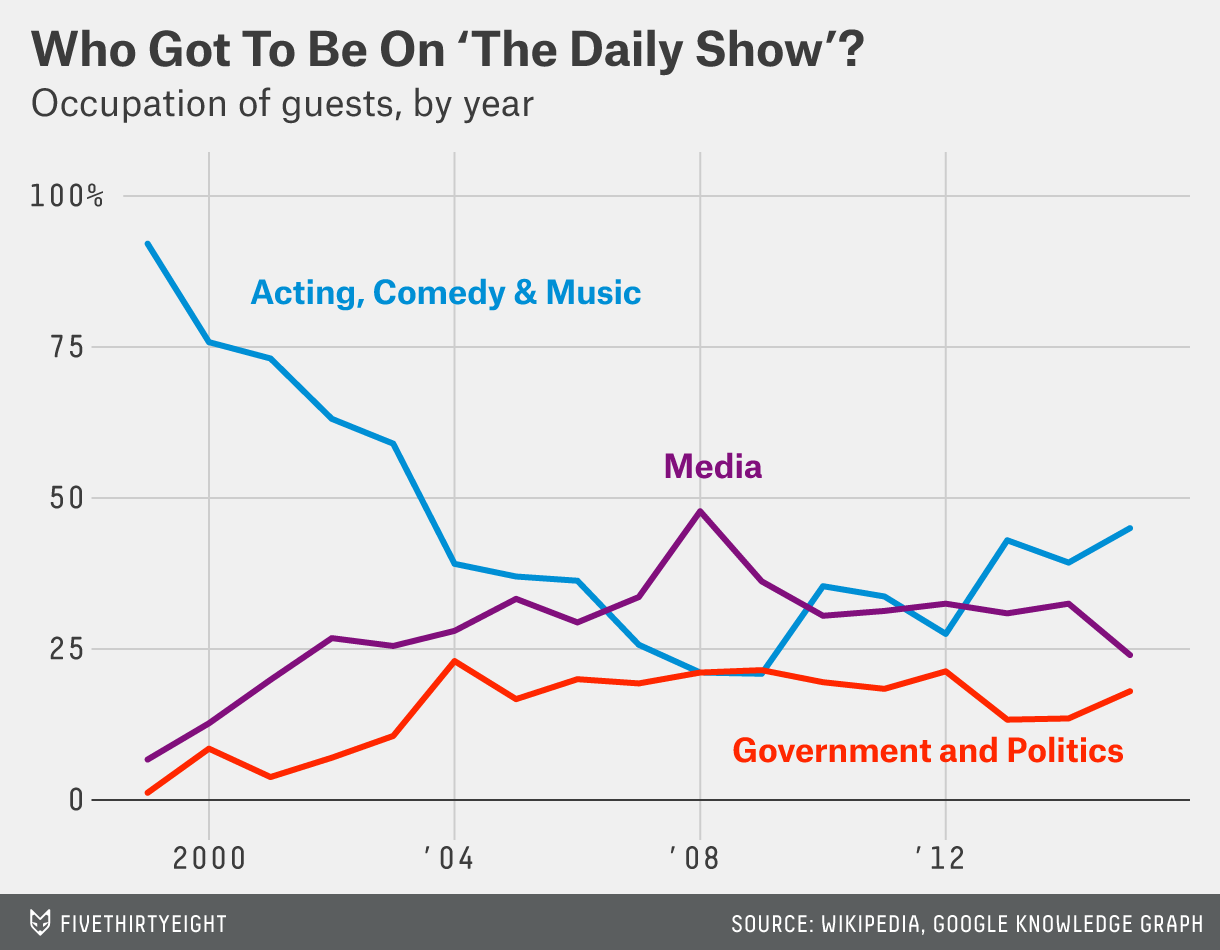

In [44]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.

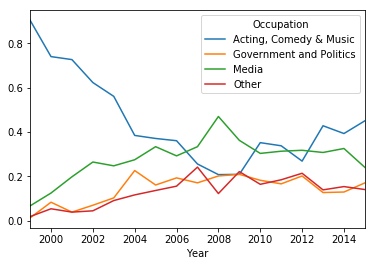

In [45]:
#proto chart
occupation.plot()

In [47]:
#drop other

occupation=occupation.drop('Other', axis=1)
occupation.head()

Occupation,"Acting, Comedy & Music",Government and Politics,Media
Year,,,
1999,0.9036144578313253,0.012048192771084338,0.06626506024096386
2000,0.7396449704142012,0.08284023668639054,0.1242603550295858
2001,0.7261146496815286,0.03821656050955414,0.19745222929936307
2002,0.6226415094339622,0.06918238993710692,0.2641509433962264
2003,0.5602409638554217,0.10240963855421686,0.2469879518072289


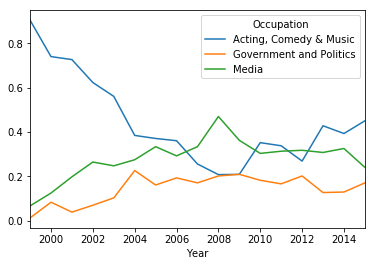

In [49]:
#updated proto chart
occupation.plot()

<Figure size 432x288 with 0 Axes>

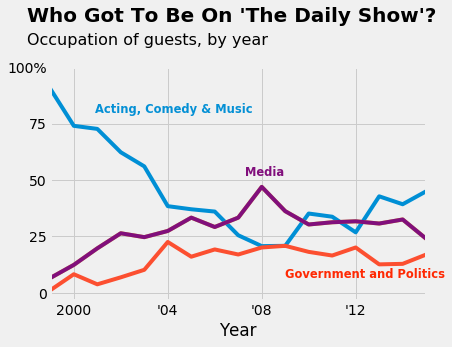

In [98]:
#Graph
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
fig = plt.figure()
fig.patch.set(facecolor='#f0f0f0')
ax=occupation.plot()

ax.text(x=1998, y=1.2, s="Who Got To Be On 'The Daily Show'?", fontsize=20, fontweight='bold', alpha=1 )
ax.text(x=1998, y=1.1, s="Occupation of guests, by year", fontsize=16, alpha =1)
ax.text(x = 2000.9, y = .8, s = 'Acting, Comedy & Music', 
           color = '#0490d5', fontsize = 11.5,
           weight = 'bold')         
ax.text(x = 2009, y = .07, s = 'Government and Politics', 
           color = '#ff2903', fontsize = 11.5,
           weight = 'bold')
ax.text(x = 2007.3, y = .52, s = 'Media', 
           color = '#810F7C', fontsize = 11.5,
           weight = 'bold')
ax_media = plt.plot(occupation['Media'], color='#810F7C')
ax.set_xticks(range(2000,2016,4))
ax.set_xticklabels(labels=['2000', '\'04', '\'08', '\'12'])
ax.set_yticks([0,.25,.50,.75,1.00])
ax.set_yticklabels(labels=[f'{i}' if i!=100 else f'{i}%' for i in range(0,125,25)])
legend=ax.legend()
legend.remove()